In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('topPicksCSV/Playoffs-Master-Combined_topPicks.csv')
# Display the first few rows of the dataframe

In [26]:
# include Points Per Minute (PPM) and Fantasy Points Per Minute (FPPM) columns
# use these columns to have insights into player health and performance
df['PPM'] = df['PTS'] / df['MP']
df['FPPM'] = df['FantasyPoints'] / df['MP']

# check for NaN or infinite values in the dataset
nan_inf_values = df.isnull().sum() + (df == float('inf')).sum() + (df == float('-inf')).sum()

# fill NaN values in 'PPM' and 'FPPM' columns with 0
df['PPM'].fillna(0, inplace=True)
df['FPPM'].fillna(0, inplace=True)


nan_inf_values

Player           0
G                0
MP               0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PTS              0
FantasyPoints    0
PPM              2
FPPM             2
dtype: int64

In [27]:
# statistics for the 'FantasyPoints' column
fantasy_points_summary = df['FantasyPoints'].describe().round(1)
fantasy_points_summary

count    460.0
mean      14.5
std       12.8
min       -1.0
25%        4.0
50%       11.1
75%       21.7
max       57.7
Name: FantasyPoints, dtype: float64

In [28]:
# use linear regression to create suggested FantasyPoints for each player, compare it to the calculated FantasyPoints and rank players based on the suggested FantasyPoints
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# exclude calculated 'FantasyPoints' and non-numeric columns
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['FantasyPoints'])

# train the Linear Regression model using stats to suggest new FantasyPoints
lr = LinearRegression()
lr.fit(features, df['FantasyPoints'])

# predict FantasyPoints for each player
df['Suggested_FantasyPoints'] = lr.predict(features)

# rank players based on the suggested FantasyPoints
df['Suggested_FantasyPoints_Rank'] = df['Suggested_FantasyPoints'].rank(ascending=False).astype(int)

# show top 25 players with the highest suggested  Ranking and FantasyPoints include 'G', 'MP', 'FantasyPoints' columns
top_25_suggested_players = df.sort_values(by='Suggested_FantasyPoints', ascending=False).head(25).round(1)[['Suggested_FantasyPoints_Rank', 'Player', 'G', 'MP', "FantasyPoints", 'Suggested_FantasyPoints']].reset_index(drop=True)
top_25_suggested_players


,Suggested_FantasyPoints_Rank,Player,G,MP,FantasyPoints,Suggested_FantasyPoints
0,1,Luka Dončić,9.3,37.6,57.7,57.7
1,2,Nikola Jokić,13.5,36.2,55.6,55.5
2,3,Kawhi Leonard,8.7,39.5,54.3,54.1
3,4,Giannis Antetokounmpo,11.2,34.1,53.3,53.4
4,5,LeBron James,14.3,37.4,50.5,50.7
5,6,Kevin Durant,9.0,42.3,50.0,50.0
6,7,De'Aaron Fox,7.0,38.6,49.5,49.5
7,8,Jayson Tatum,16.5,39.6,49.0,48.9
8,9,Ja Morant,6.3,38.5,49.0,48.9
9,10,Anthony Edwards,5.5,38.8,47.3,47.4


In [29]:
# write the suggested FantasyPoints to a CSV file
df.to_csv('topPicksCSV/Playoffs-Master-CombinedLR_topPicks.csv', index=False)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


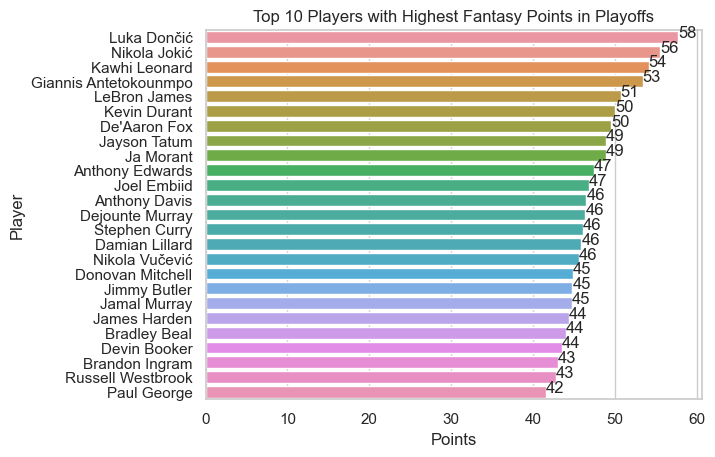

In [32]:
# using seaborn to plot bar graph for top 10 players with highest suggested fantasy points
sns.set(style="whitegrid")
ax = sns.barplot(x="Suggested_FantasyPoints", y="Player", data=top_25_suggested_players)
plt.title("Top 25 Players with Highest Fantasy Points in Playoffs")
plt.xlabel("Points")
plt.ylabel("Player")


# include suggested fantasy points in each bar align all the values to the right of the bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha="left")
    
plt.show()